---

## ***An Example from the*** `scipy.integrate.solve_ivp` ***manual page***

[Link to the manual page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

Here we consider the following ODE describing the height change of a projectile with a booster.
  <center>$\displaystyle\frac{d^2h}{dt^2}=-g+a$</center>

where $a$ represents the upward acceleration from the booster:
  <center>$a = 0$, when $0<= t < 5$</center>
  <center>$a = 5$, when $5<= t < 10$</center>
  <center>$a = 20$, when $10<= t < 20$</center>
  <center>$a = 0$, when $20<= t$</center>

The second order derivative $d^2/dt^2$ cannot be directly simulated. Thus, it should be converted into two ODEs with first order derivative $d/dt$.

  <center>$\displaystyle\frac{dh}{dt}=v$</center>

  <br>
  <center>$\displaystyle\frac{dv}{dt}=-g+a$</center>
  <br>
, where $h$ is the height (in meter) of an object, $v$ is the velocity of it (unit: $m/s$), and $g$ is the Earth's gravity acceleration constant (9.8 $m/s^2$). We will combine $h$ and $v$ into a vector.


Success? True
1 : A termination event occurred.
[array([38.87483946])]
[array([[ 1.13686838e-13, -1.11225072e+02]])]


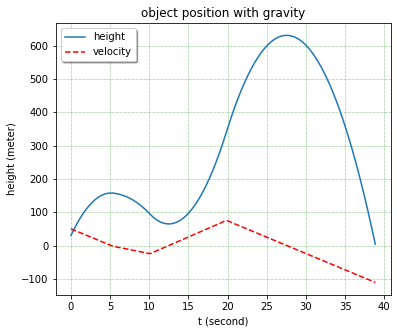

In [6]:
# Packages to import
import numpy as np
from scipy.integrate import solve_ivp

# The ODE function
# The first two parameters of the function must be 't' and 'y' in this order
def upward_cannon(t, y):
    
    # y[0] is the position of an object in height. : h
    # y[1] is the velocity in upward direction.    : v    
    
    h = y[0]
    v = y[1]
    
    if 5<=t<10:
        a = 5
    elif 10<=t<20:
        a = 20
    else:
        a = 0
    
    dhdt = v      # The rate of change of the position is its velocity
                     # dh/dt = v
    dvdt = -9.807 + a    # Earth's gravity acceleration is the rate of velocity change.
                            # dv/dt = -g
    return np.array([dhdt, dvdt])

# OPTIONAL: The termination condition function
# The first two parameters of the function must be 't' and 'y' in this order.
# The number of arguments to this function must be the same as the main ODE function.
def hit_ground(t, y):
    object_position = y[0]         # The position of an object will be probed.
    return object_position
hit_ground.terminal = True    # Set an attribute, 'terminal', to True if you want it active.
hit_ground.direction = -1     # The direction of event. If zero, any zero-crossing event is valid.
# The simulation should stop if the position of the object changes from positive values
#  (above the ground level) to negative values (below the ground level).


# We want this in almost all cases.
tspan = np.linspace(0,100,1000)

# Initial condition
yinit = [30, 50]   # Position: 20 m high.  Velocity: 100 m/sec

# The first three argument, 'fun', 't_span', and 'y0' must be included.
# If they are in the right order, you don't have to use their argument names.
# In most cases, you want to include 't_eval'.
sol = solve_ivp(fun=upward_cannon, t_span=(tspan[0], tspan[-1]), y0=yinit, 
                t_eval = tspan, events = hit_ground)

# sol.success shows if there was any error or not.
# It is success if it reached the end of tspan or a termination event occurred.
print('Success?', sol.success)
# The actual information is in sol.status (and in sol.message)
print(sol.status, ':', sol.message) # -1: Integration step failed. 
                                    # 0: The solver successfully reached the end of tspan.
                                    # 1: A termination event occurred.

# Print if the termination event has occurred.
# None will be printed if no event has occurred.
print(sol.t_events)
print(sol.y_events)

# Modify the plot function as you need.
# 'sol.t' is the same as 't_eval'
# 'sol.y' contains the solution.
import matplotlib.pyplot as plt
plt.figure(1, figsize=(6,5))
plt.plot(sol.t, sol.y[0])
plt.plot(sol.t, sol.y[1],'r--')
plt.legend(['height', 'velocity'], shadow=True)
plt.xlabel('t (second)')
plt.ylabel('height (meter)')
plt.title('object position with gravity')
plt.grid(color='g', linestyle=':', linewidth=0.5)